# Predicting Match Winners
---

In [4]:
import pandas as pd

### Data Exploration
---

In [14]:
matches = pd.read_csv("matches2022_2024.csv")
matches.shape


# EPL - 38 matches played each season, 20 teams in each season data for 2 seasons
#So we should have 1520 matches but for some reason we are missing some

#We have some data from cups so lets drop those
EPL_matches = matches.drop(matches[matches["Comp"] != "Premier League"].index)
EPL_matches.loc[EPL_matches["Season"] == 2023] = 2024 
matches.columns

#cols : 'Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
    #    'GF', 'GA', 'Opponent', 'xG_x', 'xGA', 'Poss', 'Attendance', 'Captain',
    #    'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'SoT%',
    #    'G/Sh', 'G/SoT', 'FK', 'PK', 'xG_y', 'Season', 'Name'],
    #   dtype='object

#Investigate missing matches
# EPL_matches["Name"].value_counts() #How many matches for each team

#In the EPL teams are demoted (6 teams in 2 seasons, 3 each season), I know Liverpool is a good team and has not got relagated so why so little records?
# matches[matches["team"] == "Liverpool"] #Only include data for 2021, no 2022 datas

EPL_matches["Round"].value_counts() #Perfect data as data has been grabbed during off season when all games have been completed

Round
2024            760
Matchweek 2      40
Matchweek 1      40
Matchweek 4      40
Matchweek 5      40
Matchweek 6      40
Matchweek 3      40
Matchweek 7      40
Matchweek 8      40
Matchweek 10     40
Matchweek 9      40
Matchweek 12     40
Matchweek 13     40
Matchweek 14     40
Matchweek 11     40
Matchweek 16     40
Matchweek 17     40
Matchweek 19     40
Matchweek 20     40
Matchweek 21     40
Matchweek 22     40
Matchweek 23     40
Matchweek 15     40
Matchweek 24     40
Matchweek 25     40
Matchweek 26     40
Matchweek 18     40
Matchweek 28     40
Matchweek 30     40
Matchweek 31     40
Matchweek 27     40
Matchweek 32     40
Matchweek 33     40
Matchweek 35     40
Matchweek 29     40
Matchweek 36     40
Matchweek 37     40
Matchweek 34     40
Matchweek 38     40
Name: count, dtype: int64

### Data Cleaning

In [4]:

matches.dtypes #ML Algoriths only work with numeric data

#1 - Convert date to date-time
matches["date"] = pd.to_datetime(matches["date"]) #Convert existing column to datetime

In [5]:
matches.dtypes

Unnamed: 0               int64
date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

### Creating predictoes for machine learning model (Basic model that we can build on)

In [6]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes  #Converts to catagorical var, then convert catagories into numbers
matches

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0


In [7]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes #Each opponent has unique value

In [8]:
matches["hour"] = matches["time"].str.replace(":.+","", regex = True).astype("int")

In [9]:
matches["day_code"] = matches["date"].dt.dayofweek


### Setup target variable

In [10]:
#Target is whether or not team wins, for now we just want to predict WINS

matches["target"] = (matches["result"] == "W").astype("int") 

### Create the basic model
---

In [11]:
from sklearn.ensemble import RandomForestClassifier


In [12]:
rf = RandomForestClassifier(n_estimators= 50, min_samples_split =10, random_state=1)

#n_estimators - max amount of trees
#min_samples_split - number of sample in a leaf of decision tree before splitting node (overfit, accuracy trade off)

In [28]:
train = matches[matches["date"] < "2021-05-31"]
test = matches[matches["date"] > '2021-05-31']



predictors = ["venue_code", "opp_code", "hour", "day_code"]

rf.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [29]:
preds = rf.predict(test[predictors])

### Test Accuracy
---

In [30]:
from sklearn.metrics import accuracy_score

# accuracy_score : What % of time was your prediction actually accurate

acc = accuracy_score(test["target"], preds)

In [31]:
acc

0.6216216216216216

In [64]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds, index = test.index))

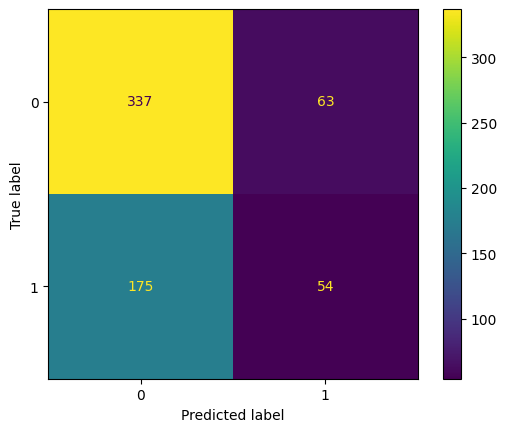

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


cm = confusion_matrix(test["target"], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# pd.crosstab(index = combined["actual"], columns = combined["prediction"])



In [66]:
from sklearn.metrics import precision_score

#When we predicted win, how many times did they actually win

precision_score(test["target"], preds)

#0.4745762711864407 - When we predicted a win, the team only won 47% of the time

0.46153846153846156

### Improving the model
---

### Imporving precision with rolling averages

In [67]:
grouped_matches = matches.groupby("team") #Make one df for each team

group = grouped_matches.get_group("Arsenal")
group

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
65,0,2021-08-13,20:00,Premier League,Matchweek 1,Fri,Away,L,0.0,2.0,...,1.0,0.0,0.0,2022,Arsenal,0,2,20,4,0
66,1,2021-08-22,16:30,Premier League,Matchweek 2,Sun,Home,L,0.0,2.0,...,0.0,0.0,0.0,2022,Arsenal,1,5,16,6,0
67,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Away,L,0.0,5.0,...,0.0,0.0,0.0,2022,Arsenal,0,12,12,5,0
68,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,1.0,0.0,...,1.0,0.0,0.0,2022,Arsenal,1,15,15,5,1
69,5,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Away,W,1.0,0.0,...,1.0,0.0,0.0,2022,Arsenal,0,4,15,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,52,2021-05-02,14:00,Premier League,Matchweek 34,Sun,Away,W,2.0,0.0,...,1.0,0.0,0.0,2021,Arsenal,0,14,14,6,1
929,54,2021-05-09,19:00,Premier League,Matchweek 35,Sun,Home,W,3.0,1.0,...,1.0,0.0,0.0,2021,Arsenal,1,20,19,6,1
930,55,2021-05-12,20:15,Premier League,Matchweek 36,Wed,Away,W,1.0,0.0,...,0.0,0.0,0.0,2021,Arsenal,0,5,20,2,1
931,56,2021-05-19,19:00,Premier League,Matchweek 37,Wed,Away,W,3.0,1.0,...,0.0,0.0,0.0,2021,Arsenal,0,6,19,2,1


In [68]:
def rolling_averages(group, cols, new_cols) : 
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed="left").mean()
    #Important to put closed left to take out the current week
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols) #Drop na only for new cols, this removes only the first 3 matches
    return group


In [69]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk" , "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [70]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x,cols,new_cols))

matches_rolling = matches_rolling.droplevel("team")

matches_rolling

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
898,6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
899,7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
900,9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
901,11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
902,13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
228,33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
229,34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
230,35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [71]:
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


### Retraining Our Model

In [96]:
def make_predictions(data, predictors):
    train = data[data["date"] < "2022-01-01"]
    test = data[data["date"] > '2022-01-01']

    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds, index = test.index))
    precision = precision_score(test["target"], preds)
    return combined, precision, preds, test["target"]


In [97]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]
predictors = predictors + new_cols

combined, precision, preds, test_target = make_predictions(matches_rolling, predictors)

In [98]:
precision 
#Precision now 0.625

0.625

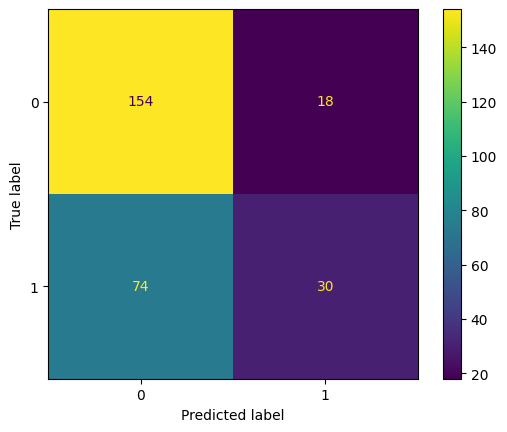

In [99]:
cm = confusion_matrix(test_target, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# pd.crosstab(index = combined["actual"], columns = combined["prediction"])



### Feature Importance Analysis
---

In [113]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


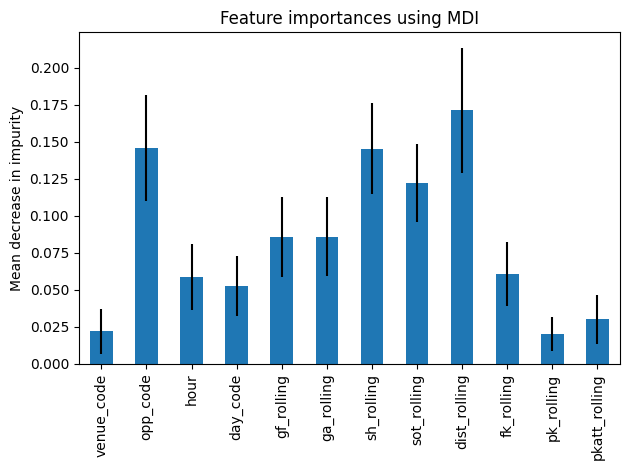

In [115]:
forest_importances = pd.Series(importances, index=predictors)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Notice that shooting distance and opp_code has big influence

In [100]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index = True, right_index = True)

In [101]:
combined


,actual,prediction,index,date,team,opponent,result
55,0,0,55,2022-01-23,Arsenal,Burnley,D
56,1,0,56,2022-02-10,Arsenal,Wolves,W
57,1,0,57,2022-02-19,Arsenal,Brentford,W
58,1,1,58,2022-02-24,Arsenal,Wolves,W
59,1,1,59,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...,...
1312,1,0,1312,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,1313,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,1314,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,1315,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


### Calculate Points

In [102]:
combined["predicted_points"] = combined["prediction"].apply(lambda x: 3 if x == 1 else 0)
combined["actual_points"] = combined["prediction"].apply(lambda x: 3 if x == 1 else 0)

groups = combined.groupby("team")

In [105]:
groups
group = groups.get_group("Arsenal")
group

,actual,prediction,index,date,team,opponent,result,predicted_points,actual_points
55,0,0,55,2022-01-23,Arsenal,Burnley,D,0,0
56,1,0,56,2022-02-10,Arsenal,Wolves,W,0,0
57,1,0,57,2022-02-19,Arsenal,Brentford,W,0,0
58,1,1,58,2022-02-24,Arsenal,Wolves,W,3,3
59,1,1,59,2022-03-06,Arsenal,Watford,W,3,3
60,1,1,60,2022-03-13,Arsenal,Leicester City,W,3,3
61,0,1,61,2022-03-16,Arsenal,Liverpool,L,3,3
62,1,0,62,2022-03-19,Arsenal,Aston Villa,W,0,0
63,0,0,63,2022-04-04,Arsenal,Crystal Palace,L,0,0
64,0,0,64,2022-04-09,Arsenal,Brighton,L,0,0


### Comparing Home/Away predictions

In [ ]:
#Our model may have made different predictions for the same match - Eg Arsenal Burnely

In [107]:
class MissingDict(dict): #Inherits from dictionary class
    __missing__= lambda self, key: key #Override default functionality of missing keys in python dictionary

map_values = {
    "Brighton and Hove Albion" : "Brighton",
    "Manchester United" : "Manchester Utd",
    "Newcastle United" : "Newcastle Utd",
    "Tottenham Hotspur" : "Tottenham",
    "West Ham United"  : "West Ham",
    "Wolverhamption Wanderes" : "Wolves"
}

mapping = MissingDict(**map_values)

mapping["Wolverhamption Wanderes"]


'Wolves'

In [108]:
combined["new_team"] = combined["team"].map(mapping)
combined

,actual,prediction,index,date,team,opponent,result,predicted_points,actual_points,new_team
55,0,0,55,2022-01-23,Arsenal,Burnley,D,0,0,Arsenal
56,1,0,56,2022-02-10,Arsenal,Wolves,W,0,0,Arsenal
57,1,0,57,2022-02-19,Arsenal,Brentford,W,0,0,Arsenal
58,1,1,58,2022-02-24,Arsenal,Wolves,W,3,3,Arsenal
59,1,1,59,2022-03-06,Arsenal,Watford,W,3,3,Arsenal
...,...,...,...,...,...,...,...,...,...,...
1312,1,0,1312,2022-03-13,Wolverhampton Wanderers,Everton,W,0,0,Wolverhampton Wanderers
1313,0,0,1313,2022-03-18,Wolverhampton Wanderers,Leeds United,L,0,0,Wolverhampton Wanderers
1314,1,0,1314,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,0,0,Wolverhampton Wanderers
1315,0,0,1315,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,0,0,Wolverhampton Wanderers


In [110]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"]) #Merge the two predictions to see if the same thing got predicted
merged

,actual_x,prediction_x,index_x,date,team_x,opponent_x,result_x,predicted_points_x,actual_points_x,new_team_x,actual_y,prediction_y,index_y,team_y,opponent_y,result_y,predicted_points_y,actual_points_y,new_team_y
0,0,0,55,2022-01-23,Arsenal,Burnley,D,0,0,Arsenal,0,0,287,Burnley,Arsenal,D,0,0,Burnley
1,1,0,56,2022-02-10,Arsenal,Wolves,W,0,0,Arsenal,0,0,1305,Wolverhampton Wanderers,Arsenal,L,0,0,Wolverhampton Wanderers
2,1,0,57,2022-02-19,Arsenal,Brentford,W,0,0,Arsenal,0,0,157,Brentford,Arsenal,L,0,0,Brentford
3,1,1,58,2022-02-24,Arsenal,Wolves,W,3,3,Arsenal,0,0,1308,Wolverhampton Wanderers,Arsenal,L,0,0,Wolverhampton Wanderers
4,1,1,59,2022-03-06,Arsenal,Watford,W,3,3,Arsenal,0,0,1138,Watford,Arsenal,L,0,0,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,0,1244,2022-03-20,West Ham United,Tottenham,L,0,0,West Ham,1,1,1110,Tottenham Hotspur,West Ham,W,3,3,Tottenham
243,1,0,1245,2022-04-03,West Ham United,Everton,W,0,0,West Ham,0,0,497,Everton,West Ham,L,0,0,Everton
244,0,0,1246,2022-04-10,West Ham United,Brentford,L,0,0,West Ham,1,1,163,Brentford,West Ham,W,3,3,Brentford
245,0,0,1247,2022-04-17,West Ham United,Burnley,D,0,0,West Ham,0,0,300,Burnley,West Ham,D,0,0,Burnley


In [112]:
# Look at just the rows where one team won and the other lost, these are the rows that have more confidence

merged[(merged["prediction_x"] == 1) & (merged["prediction_y" ] == 0 )]["actual_x"].value_counts()


actual_x
1    26
0    13
Name: count, dtype: int64

## Recap and Next Steps

In [ ]:
### Next Steps

# 1) Only have 2 seasons of data, could have 10 seasons of data
# 2) Use more of the columns 
# 3) Use other algorithms that have non linear relationships
# 4) Get records of teams and use as a feature
# 5) Did the teams play in any other competitions, if so were they tired?